## Modelado

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import cv2
import numpy
import pandas
#import imageio.v3 as io

#from tqdm import tqdm
from typing import Optional, Union
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%matplotlib inline


# Train

In [22]:
# Comprobamos a abrirlos de nuevo
saved_data_Train = pandas.read_csv("/content/drive/MyDrive/datos/nuevo/filtered_data_Train.csv", sep=';')
#saved_data_Train["Zipcode"] = saved_data_Train["Zipcode"].str.replace(r'\D', '', regex=True)
#saved_data_Train["Zipcode"].fillna("28012", inplace=True)  # Rellena los NaN con un valor predeterminado, como "0"
#saved_data_Train["Zipcode"] = saved_data_Train["Zipcode"].astype(int)

#saved_imgs_Train = numpy.load("/tf/data/imageTrain.npy")
saved_data_Train.info()#, saved_imgs_Train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              6762 non-null   float64
 1   Zipcode            6762 non-null   int64  
 2   Accommodates       6762 non-null   int64  
 3   Bathrooms          6762 non-null   float64
 4   Bedrooms           6762 non-null   float64
 5   Beds               6762 non-null   float64
 6   Security Deposit   6762 non-null   float64
 7   Cleaning Fee       6762 non-null   float64
 8   Guests Included    6762 non-null   int64  
 9   Extra People       6762 non-null   int64  
 10  Minimum Nights     6762 non-null   int64  
 11  Maximum Nights     6762 non-null   int64  
 12  Number of Reviews  6762 non-null   int64  
 13  Thumbnail Url      6762 non-null   object 
dtypes: float64(6), int64(7), object(1)
memory usage: 739.7+ KB


In [23]:
y_train = saved_data_Train.iloc[:, 0:1]   # Seleccionamos la primera columna, price
X_train = saved_data_Train.iloc[:, 1:-1]  # Seleccionamos todas las columnas excepto la primera y la última

scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

X_train = XtrainScaled

# Test

In [24]:
# Comprobamos a abrirlos de nuevo
saved_data_Test = pandas.read_csv("/content/drive/MyDrive/datos/nuevo/filtered_data_Test.csv", sep=';')
#saved_data_Test["Zipcode"].fillna("28012", inplace=True)  # Rellena los NaN con un valor predeterminado, como "0"
#saved_data_Test["Zipcode"] = saved_data_Test["Zipcode"].astype(int)
saved_data_Test.shape#, saved_imgs_Test.shape

(852, 14)

In [25]:
y_test = saved_data_Test.iloc[:, 0:1]      # nos quedamos con la 1ª columna, price
X_test = saved_data_Test.iloc[:,1:-1]      # nos quedamos con el resto


# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test)
X_test = XtestScaled

# Validacion

In [26]:
# Comprobamos a abrirlos de nuevo
saved_data_Val = pandas.read_csv("/content/drive/MyDrive/datos/nuevo/filtered_data_Val.csv", sep=';')
#saved_data_Val["Zipcode"].fillna("28012", inplace=True)  # Rellena los NaN con un valor predeterminado, como "0"
#saved_data_Val["Zipcode"] = saved_data_Val["Zipcode"].astype(int)
saved_data_Val.shape#, saved_imgs_Val.shape

(839, 14)

In [27]:
y_val = saved_data_Val.iloc[:,0:1]     # nos quedamos con la 1ª columna, price
X_val = saved_data_Val.iloc[:,1:-1]      # nos quedamos con el resto


# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XvalScaled = scaler.transform(X_val)

X_val = XvalScaled

Así, por ejemplo, cargamos y visualizamos la distribución de las etiquetas:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              6762 non-null   float64
 1   Zipcode            6762 non-null   int64  
 2   Accommodates       6762 non-null   int64  
 3   Bathrooms          6762 non-null   float64
 4   Bedrooms           6762 non-null   float64
 5   Beds               6762 non-null   float64
 6   Security Deposit   6762 non-null   float64
 7   Cleaning Fee       6762 non-null   float64
 8   Guests Included    6762 non-null   int64  
 9   Extra People       6762 non-null   int64  
 10  Minimum Nights     6762 non-null   int64  
 11  Maximum Nights     6762 non-null   int64  
 12  Number of Reviews  6762 non-null   int64  
 13  Thumbnail Url      6762 non-null   object 
dtypes: float64(6), int64(7), object(1)
memory usage: 739.7+ KB


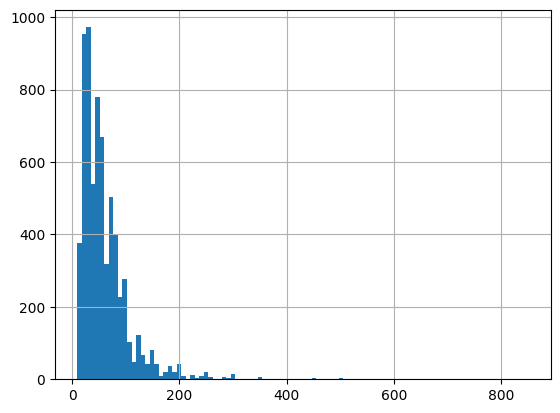

In [28]:
saved_data_Train['Price'].hist(bins=100)
saved_data_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              852 non-null    float64
 1   Zipcode            852 non-null    int64  
 2   Accommodates       852 non-null    int64  
 3   Bathrooms          852 non-null    float64
 4   Bedrooms           852 non-null    float64
 5   Beds               852 non-null    float64
 6   Security Deposit   852 non-null    float64
 7   Cleaning Fee       852 non-null    float64
 8   Guests Included    852 non-null    int64  
 9   Extra People       852 non-null    int64  
 10  Minimum Nights     852 non-null    int64  
 11  Maximum Nights     852 non-null    int64  
 12  Number of Reviews  852 non-null    int64  
 13  Thumbnail Url      852 non-null    object 
dtypes: float64(6), int64(7), object(1)
memory usage: 93.3+ KB


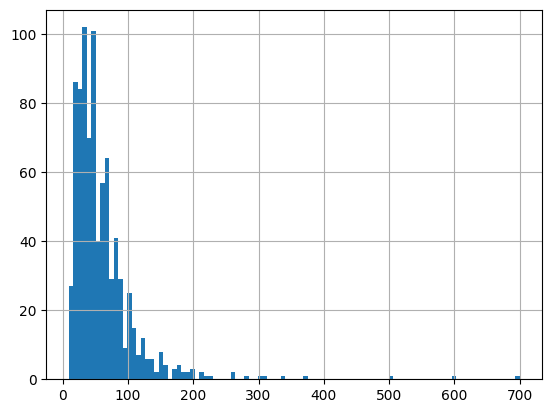

In [29]:
saved_data_Test['Price'].hist(bins=100)
saved_data_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              839 non-null    float64
 1   Zipcode            839 non-null    int64  
 2   Accommodates       839 non-null    int64  
 3   Bathrooms          839 non-null    float64
 4   Bedrooms           839 non-null    float64
 5   Beds               839 non-null    float64
 6   Security Deposit   839 non-null    float64
 7   Cleaning Fee       839 non-null    float64
 8   Guests Included    839 non-null    int64  
 9   Extra People       839 non-null    int64  
 10  Minimum Nights     839 non-null    int64  
 11  Maximum Nights     839 non-null    int64  
 12  Number of Reviews  839 non-null    int64  
 13  Thumbnail Url      839 non-null    object 
dtypes: float64(6), int64(7), object(1)
memory usage: 91.9+ KB


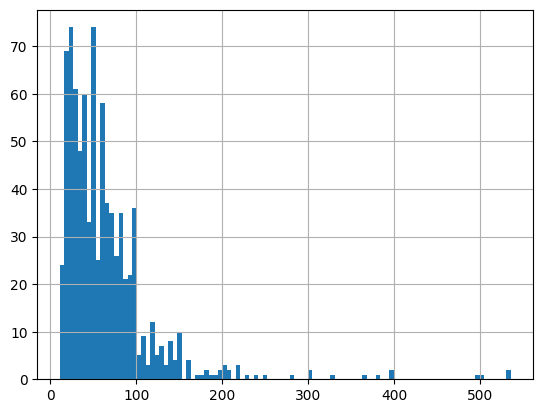

In [30]:
saved_data_Val['Price'].hist(bins=100)
saved_data_Val.info()

# Modelo 1
Usando los datos tabulares

In [31]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [32]:
# Verificar si hay una GPU disponible
print(tf.config.list_physical_devices('GPU'))
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar el uso de la memoria GPU
        tf.config.experimental.set_memory_growth(gpus[0], True)
        # Establecer el dispositivo GPU visible para Keras
        tf.config.set_visible_devices(gpus[0], 'GPU')
        print("GPU disponible y configurada correctamente")
    except:
        print("Error al configurar la GPU")
else:
    print("No se detectó ninguna GPU")


[]
No se detectó ninguna GPU


In [33]:
# Verificar si hay valores NaN en X_train
has_nan1 = np.isnan(X_train).any()

# Imprimir el resultado
if has_nan1:
    print("X_train contiene valores NaN.")
else:
    print("X_train no contiene valores NaN.")

X_train no contiene valores NaN.


In [34]:
# Verificar si hay valores NaN en X_train
nan_mask = np.isnan(X_train)
nan_count = np.sum(nan_mask)

# Obtener las posiciones de los valores NaN
nan_indices = np.where(nan_mask)

# Imprimir el número de valores NaN y las posiciones
print("Número de valores NaN en X_train:", nan_count)
print("Posiciones de los valores NaN en X_train:", nan_indices)

Número de valores NaN en X_train: 0
Posiciones de los valores NaN en X_train: (array([], dtype=int64), array([], dtype=int64))


In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def train_deep_net(activation_function, learning_rate, batch_size, num_epochs):
    # Implementamos la red empleando Keras
    model = Sequential()
    #model.add(Flatten())
    #model.add(Dense(200, activation=activation_function))
    #model.add(Dense(100, activation=activation_function))
    #model.add(Dense(60, activation=activation_function))
    model.add(Dense(30, activation=activation_function))
    model.add(Dense(1))  # Capa de salida sin función de activación para la regresión

    # Compilamos y entrenamos el modelo Adam
    print("[INFO]: Entrenando red neuronal...")
    opt = Adam(learning_rate=learning_rate)
    model.compile(loss="mean_squared_error", optimizer=opt, metrics=["mse"])

    # Definimos el callback para guardar el mejor modelo y el historial de entrenamiento
    checkpoint_filepath = '/content/drive/MyDrive/datos/nuevo/best_model.h5'
    checkpoint = ModelCheckpoint(checkpoint_filepath, monitor='val_loss', save_best_only=True, mode='min', verbose=1)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs, batch_size=batch_size, callbacks=[checkpoint])

    # Cargar el mejor modelo guardado
    best_model = tf.keras.models.load_model(checkpoint_filepath)

    # Obtener las métricas de entrenamiento y validación del historial
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_mse = history.history['mse']
    val_mse = history.history['val_mse']

    # Mostrar gráfico de pérdida
    plt.style.use("ggplot")
    plt.figure()
    epochs = range(1, num_epochs + 1)
    plt.plot(epochs, train_loss, label="train_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # Mostrar gráfico de métricas
    plt.figure()
    plt.plot(epochs, train_mse, label="train_mse")
    plt.plot(epochs, val_mse, label="val_mse")
    plt.title("Training and Validation MSE")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend()
    plt.show()

    # Evaluamos el modelo en los datos de prueba
    print("[INFO]: Evaluando red neuronal...")
    y_pred = best_model.predict(X_test)

    # Calculamos las métricas de regresión
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Imprimimos las métricas
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R2 Score:", r2)


[INFO]: Entrenando red neuronal...
Epoch 1/20
49/53 [==========================>...] - ETA: 0s - loss: 5705.9062 - mse: 5705.9062 
Epoch 1: val_loss improved from inf to 4597.23926, saving model to /content/drive/MyDrive/datos/nuevo/best_model.h5
53/53 [==============================] - 1s 5ms/step - loss: 5543.6470 - mse: 5543.6470 - val_loss: 4597.2393 - val_mse: 4597.2393
Epoch 2/20
41/53 [======================>.......] - ETA: 0s - loss: 2808.8174 - mse: 2808.8174
Epoch 2: val_loss improved from 4597.23926 to 2390.44629, saving model to /content/drive/MyDrive/datos/nuevo/best_model.h5
53/53 [==============================] - 0s 2ms/step - loss: 2604.9160 - mse: 2604.9160 - val_loss: 2390.4463 - val_mse: 2390.4463
Epoch 3/20
42/53 [======================>.......] - ETA: 0s - loss: 1861.3458 - mse: 1861.3458
Epoch 3: val_loss improved from 2390.44629 to 2007.39380, saving model to /content/drive/MyDrive/datos/nuevo/best_model.h5
53/53 [==============================] - 0s 3ms/step - 

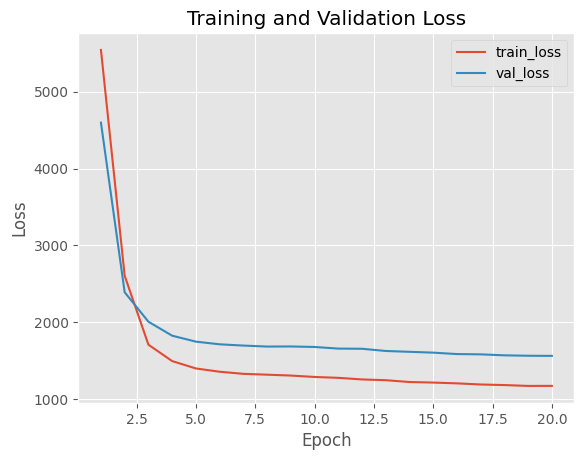

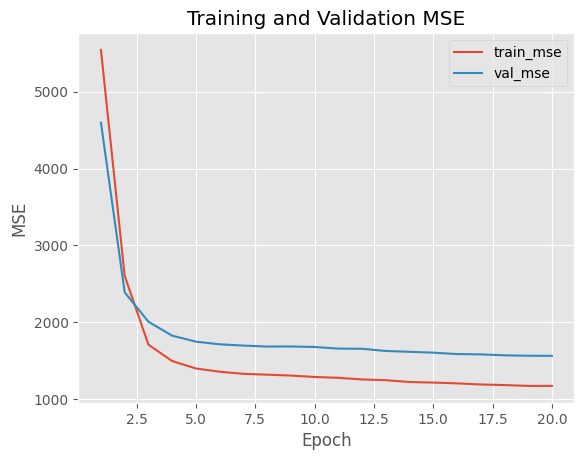

[INFO]: Evaluando red neuronal...
27/27 [==============================] - 0s 851us/step
Mean Squared Error: 1327.3889177868489
Mean Absolute Error: 18.41390878213963
R2 Score: 0.5385458170101309


In [36]:

# Define los hiperparámetros
activation_function = tf.nn.relu
learning_rate = 0.01
num_epochs = 20
batch_size = 128

# Llama a la función de entrenamiento de la red neuronal
train_deep_net(activation_function, learning_rate, batch_size, num_epochs)



Se probo con un modelo muy complejo y con el numero de datos habia overfiting . Me quede con unasola capa y manipule los hyperparametro y no consegui bajar reducir el overfition, entonces use una tecnica de regularizacion

In [37]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout


def train_deep_net2(activation_function, learning_rate, batch_size, num_epochs, l2_lambda):
    # Implementamos la red empleando Keras
    model = Sequential()
    #model.add(Flatten())
    #model.add(Dense(200, activation=activation_function, kernel_regularizer=regularizers.l2(l2_lambda)))
    model.add(Dense(100, activation=activation_function, kernel_regularizer=regularizers.l2(l2_lambda)))
    model.add(Dropout(0.25))

    #model.add(Dense(2048, activation=activation_function, kernel_regularizer=regularizers.l2(l2_lambda)))
    model.add(Dense(1024, activation=activation_function, kernel_regularizer=regularizers.l2(l2_lambda)))
    model.add(Dense(1))  # Capa de salida sin función de activación para la regresión

    # Compilamos y entrenamos el modelo Adam
    print("[INFO]: Entrenando red neuronal...")
    opt = Adam(learning_rate=learning_rate)
    model.compile(loss="mean_squared_error", optimizer=opt, metrics=["mse"])

    # Definimos el callback para guardar el mejor modelo y el historial de entrenamiento
    checkpoint_filepath = '/content/drive/MyDrive/datos/nuevo/best_model2.h5'
    checkpoint = ModelCheckpoint(checkpoint_filepath, monitor='val_loss', save_best_only=True, mode='min', verbose=1)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs, batch_size=batch_size, callbacks=[checkpoint])

    # Cargar el mejor modelo guardado
    best_model = tf.keras.models.load_model(checkpoint_filepath)
    # Obtener el historial de entrenamiento del mejor modelo
    best_model_history = history.history

    # Obtener las métricas de entrenamiento y validación del mejor modelo
    train_loss = best_model_history['loss']
    val_loss = best_model_history['val_loss']
    train_mse = best_model_history['mse']
    val_mse = best_model_history['val_mse']

    # Mostrar gráfica de loss y métrica de entrenamiento y validación
    plt.style.use("ggplot")

    # Gráfico de pérdida
    plt.figure()
    epochs = range(1, num_epochs + 1)
    plt.plot(epochs, train_loss, label="train_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # Gráfico de métricas
    plt.figure()
    plt.plot(epochs, train_mse, label="train_mse")
    plt.plot(epochs, val_mse, label="val_mse")
    plt.title("Training and Validation MSE")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend()
    plt.show()
    # Evaluamos el modelo en los datos de prueba
    print("[INFO]: Evaluando red neuronal...")
    y_pred = best_model.predict(X_test)

    # Calculamos las métricas de regresión
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Imprimimos las métricas
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R2 Score:", r2)

[INFO]: Entrenando red neuronal...
Epoch 1/20
50/53 [===========================>..] - ETA: 0s - loss: 2003.4954 - mse: 2002.9476
Epoch 1: val_loss improved from inf to 1805.69824, saving model to /content/drive/MyDrive/datos/nuevo/best_model2.h5
53/53 [==============================] - 1s 7ms/step - loss: 1992.0468 - mse: 1991.4933 - val_loss: 1805.6982 - val_mse: 1805.0236
Epoch 2/20
52/53 [============================>.] - ETA: 0s - loss: 1423.5369 - mse: 1422.8705
Epoch 2: val_loss did not improve from 1805.69824
53/53 [==============================] - 0s 5ms/step - loss: 1414.6986 - mse: 1414.0328 - val_loss: 1924.8107 - val_mse: 1924.1829
Epoch 3/20
40/53 [=====================>........] - ETA: 0s - loss: 1367.8475 - mse: 1367.1958
Epoch 3: val_loss improved from 1805.69824 to 1735.47656, saving model to /content/drive/MyDrive/datos/nuevo/best_model2.h5
53/53 [==============================] - 0s 5ms/step - loss: 1386.3079 - mse: 1385.6558 - val_loss: 1735.4766 - val_mse: 1734.8

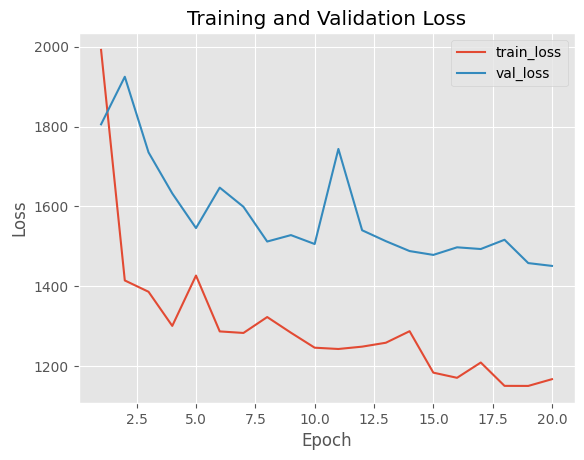

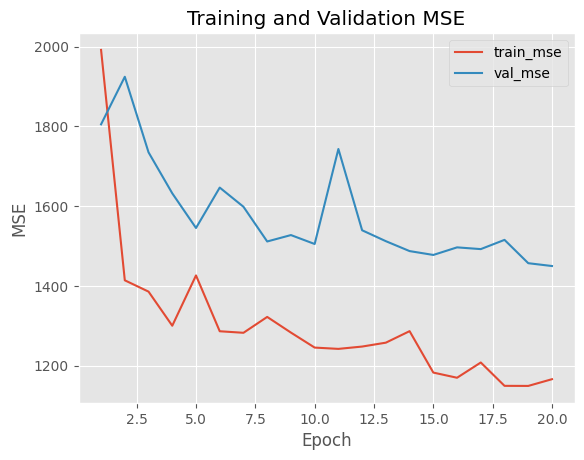

[INFO]: Evaluando red neuronal...
27/27 [==============================] - 0s 1ms/step
Mean Squared Error: 1270.857312893753
Mean Absolute Error: 18.788362300451933
R2 Score: 0.5581984939305802


In [38]:

# Define los hiperparámetros
activation_function = tf.nn.relu
learning_rate = 0.01
num_epochs = 20
batch_size = 128
l2_lambda = 0.001
# Llama a la función de entrenamiento de la red neuronal
train_deep_net2(activation_function, learning_rate, batch_size, num_epochs, l2_lambda)



Con la regularizacion bajo de 0.54 a o.56. Valores que no son buenos. Me Gustaria probar con nuevos hiperparametros

In [39]:
# instalamos los paquetes necesarios
!pip install networkx==1.11 # para instala hyperopt correctamente, si no, da errores
!pip install hyperopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.6 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
hyperopt 0.2.7 requires networkx>=2.2, but you have networkx 1.11 which is incompatible.
scikit-image 0.19.3 requires networkx>=2.2, but you have networkx 1.11 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.8 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 1.11
    Uninstalling networkx-1.11:
      Successfully uninstalled networkx-1.11


In [40]:
# imports necesarios
import sys
import time
import numpy as np
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

SEED = 42

space = {
    #'n_neurons': hp.choice('n_neurons', [32, 64, 128]),
    #'n_neurons': hp.choice('n_neurons', [512, 1024, 2018]),
    'n_neurons': hp.choice('n_neurons', [32, 64]),
    'dropout': hp.uniform('dropout', 0.0,0.5),
    'n_layers': hp.choice('n_layers', [1, 2])
}

def get_callbacks():
    callbacks = [EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=2, verbose=0, mode='auto')]
    return callbacks

def train_model(params):
    print('Parameters:', params)

    model = Sequential()

    # Construye la arquitectura del modelo basada en los parámetros
    for _ in range(params['n_layers']):
        model.add(Dense(params['n_neurons'], activation='relu'))
        model.add(Dropout(params['dropout']))

    model.add(Dense(1))  # Capa de salida sin función de activación para la regresión

    # Compila el modelo
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=1e-4), metrics=['mse'])

    # Entrena el modelo
    history = model.fit(X_train, y_train, batch_size=128, shuffle=True, epochs=10,
                        validation_data=(X_val, y_val), verbose=0, callbacks=get_callbacks())

    # Evalúa el modelo en los datos de prueba
    y_pred = model.predict(X_test)

    # Visualiza los datos reales (y_test) vs las predicciones (y_pred)
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_test)), y_test, color='blue', label='Datos reales')
    plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicciones')
    plt.title('Comparación entre los datos reales y las predicciones')
    plt.xlabel('Índice de muestra')
    plt.ylabel('Valor')
    plt.legend()
    plt.show()

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print('Mean Squared Error:', mse)
    print('Mean Absolute Error:', mae)
    print('R2 Score:', r2)

    sys.stdout.flush()

    return {'loss': mse, 'status': STATUS_OK, 'model': model, 'history': history}


Parameters:
{'dropout': 0.33536906880859035, 'n_layers': 2, 'n_neurons': 32}
27/27 [==============================] - 0s 1ms/step

  0%|          | 0/10 [00:02<?, ?trial/s, best loss=?]

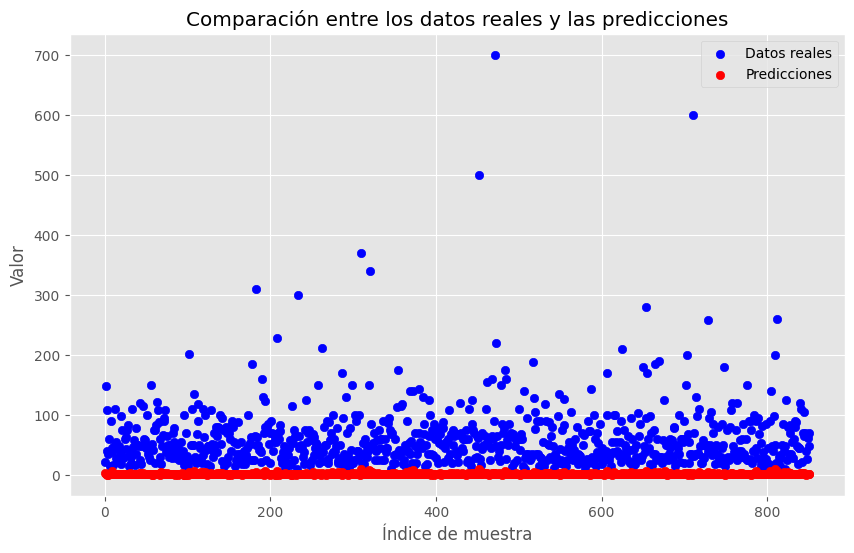

Mean Squared Error:
6230.355826010816
Mean Absolute Error:
58.47865096553111
R2 Score:
-1.1659241831109375
Parameters:
{'dropout': 0.06572042057202321, 'n_layers': 2, 'n_neurons': 32}
27/27 [==============================] - 0s 5ms/step

 10%|█         | 1/10 [00:07<00:25,  2.81s/trial, best loss: 6230.355826010816]

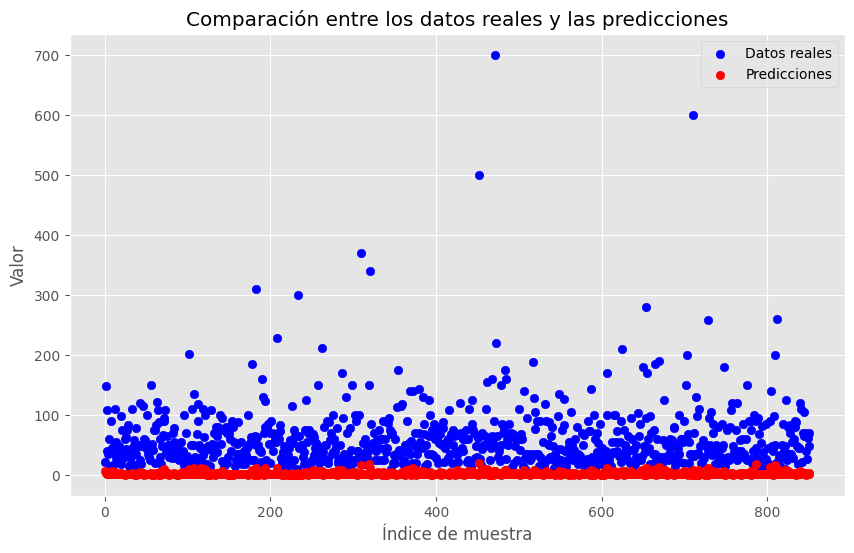

Mean Squared Error:
6085.927871889835
Mean Absolute Error:
57.93373691944729
R2 Score:
-1.1157151730184651
Parameters:
{'dropout': 0.33465842204388674, 'n_layers': 1, 'n_neurons': 32}
27/27 [==============================] - 0s 1ms/step

 20%|██        | 2/10 [00:10<00:32,  4.02s/trial, best loss: 6085.927871889835]

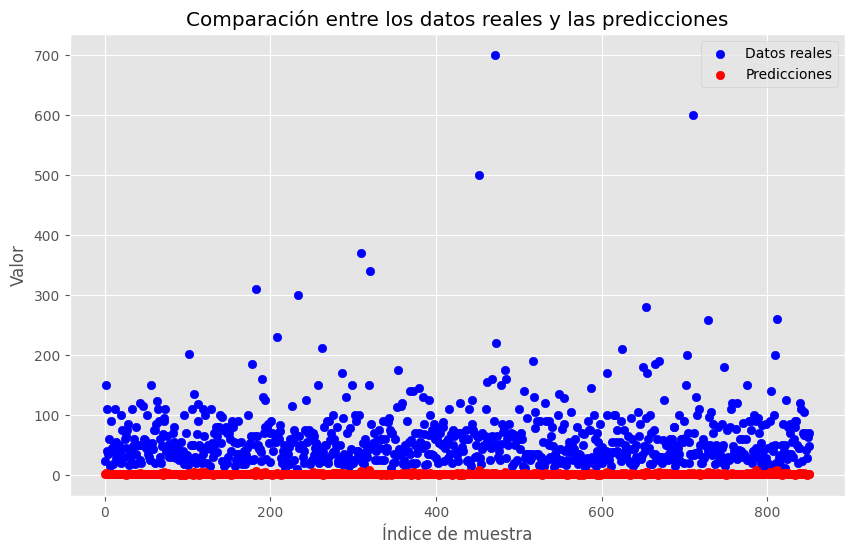

Mean Squared Error:
6375.725132266817
Mean Absolute Error:
59.589543801067755
R2 Score:
-1.2164604453557746
Parameters:
{'dropout': 0.22028853406749566, 'n_layers': 1, 'n_neurons': 32}
27/27 [==============================] - 0s 2ms/step

 30%|███       | 3/10 [00:14<00:25,  3.69s/trial, best loss: 6085.927871889835]

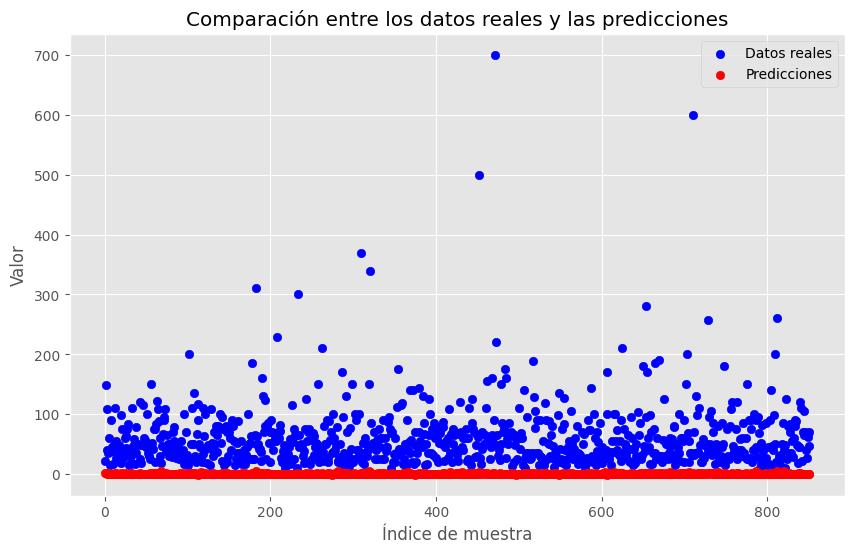

Mean Squared Error:
6421.402188445172
Mean Absolute Error:
59.66469921413022
R2 Score:
-1.232339641240059
Parameters:
{'dropout': 0.011434751390359377, 'n_layers': 2, 'n_neurons': 64}
27/27 [==============================] - 0s 2ms/step

 40%|████      | 4/10 [00:19<00:23,  3.85s/trial, best loss: 6085.927871889835]

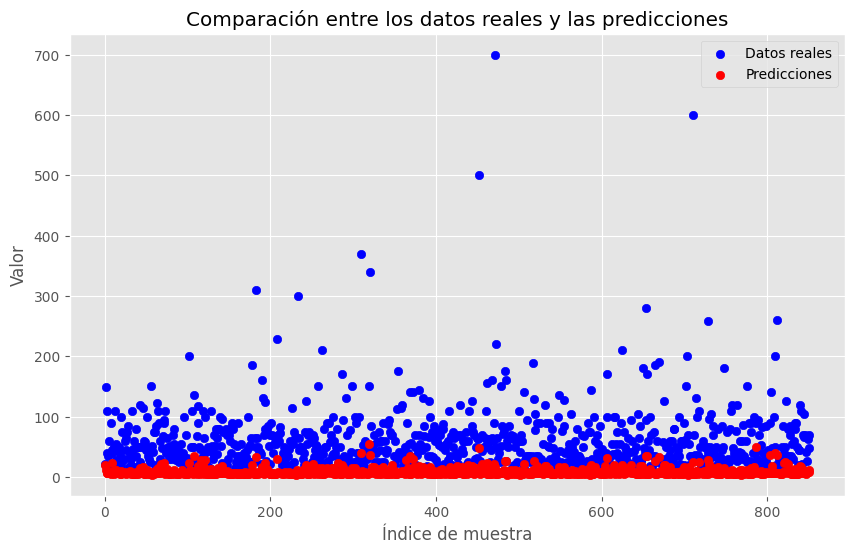

Mean Squared Error:
5244.993966015677
Mean Absolute Error:
51.91669345461707
R2 Score:
-0.8233724667597464
Parameters:
{'dropout': 0.1071708488059922, 'n_layers': 2, 'n_neurons': 64}
27/27 [==============================] - 0s 1ms/step

 50%|█████     | 5/10 [00:23<00:21,  4.29s/trial, best loss: 5244.993966015677]

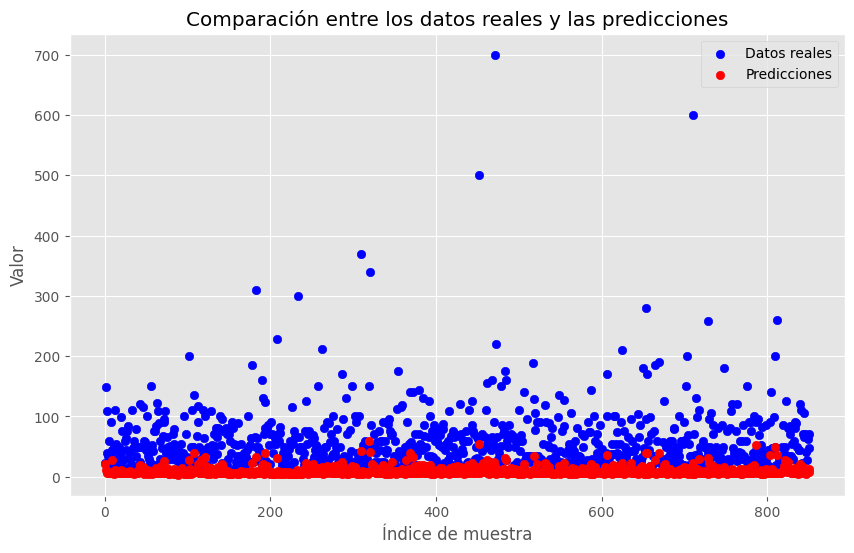

Mean Squared Error:
5126.526533219832
Mean Absolute Error:
51.24745477980851
R2 Score:
-0.7821883859834355
Parameters:
{'dropout': 0.07888982978816339, 'n_layers': 1, 'n_neurons': 32}
27/27 [==============================] - 0s 1ms/step

 60%|██████    | 6/10 [00:25<00:16,  4.07s/trial, best loss: 5126.526533219832]

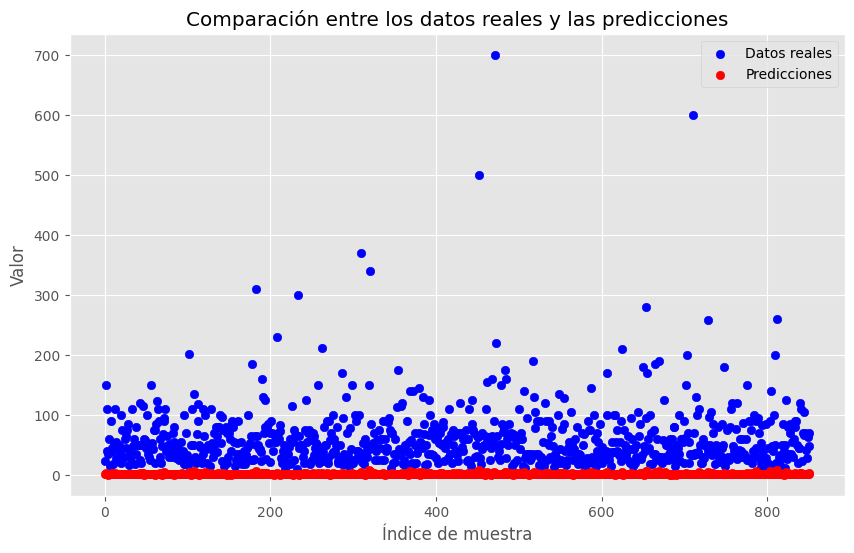

Mean Squared Error:
6365.392168392335
Mean Absolute Error:
59.565228442294185
R2 Score:
-1.2128682883483823
Parameters:
{'dropout': 0.2888333284323773, 'n_layers': 1, 'n_neurons': 64}
27/27 [==============================] - 0s 1ms/step

 70%|███████   | 7/10 [00:27<00:10,  3.45s/trial, best loss: 5126.526533219832]

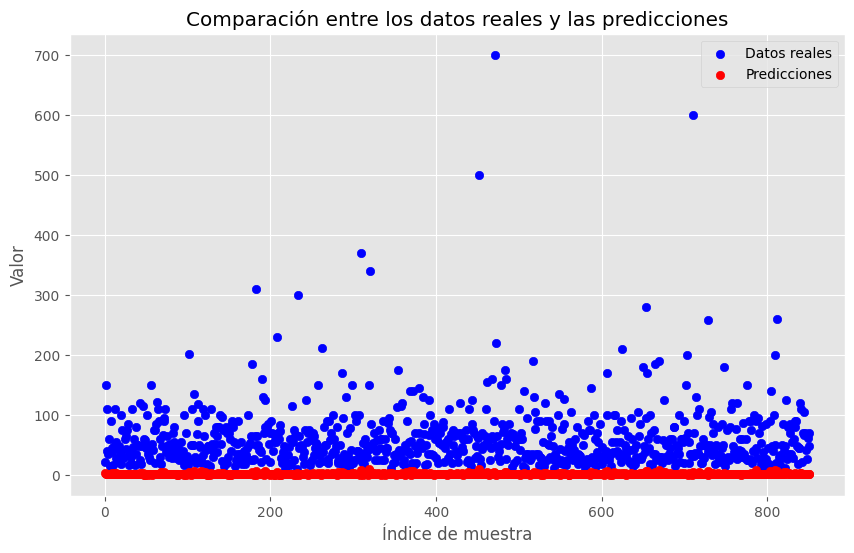

Mean Squared Error:
6293.422331620616
Mean Absolute Error:
59.05731758226951
R2 Score:
-1.1878486563608108
Parameters:
{'dropout': 0.2060699958803961, 'n_layers': 2, 'n_neurons': 64}
27/27 [==============================] - 0s 1ms/step

 80%|████████  | 8/10 [00:29<00:05,  2.93s/trial, best loss: 5126.526533219832]

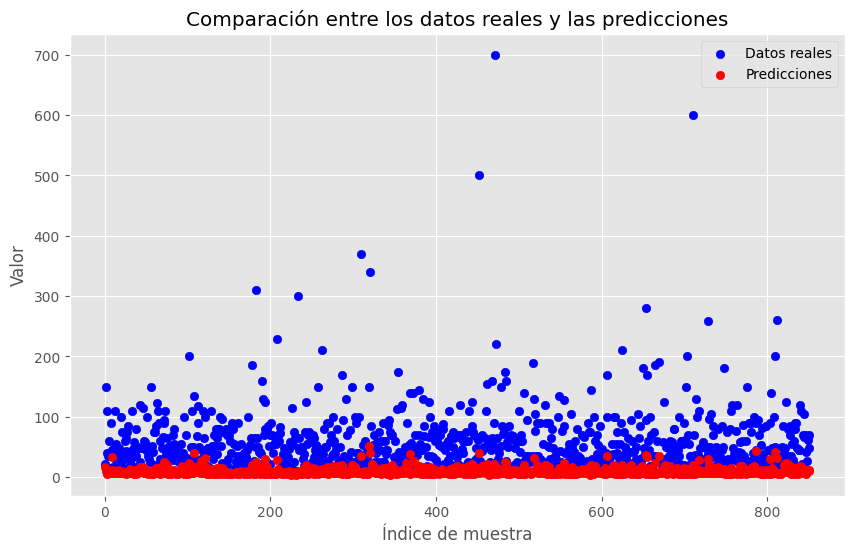

Mean Squared Error:
5173.348726802842
Mean Absolute Error:
50.94211337599956
R2 Score:
-0.7984656780386272
Parameters:
{'dropout': 0.45283316072406565, 'n_layers': 1, 'n_neurons': 64}
27/27 [==============================] - 0s 1ms/step

 90%|█████████ | 9/10 [00:32<00:02,  2.70s/trial, best loss: 5126.526533219832]

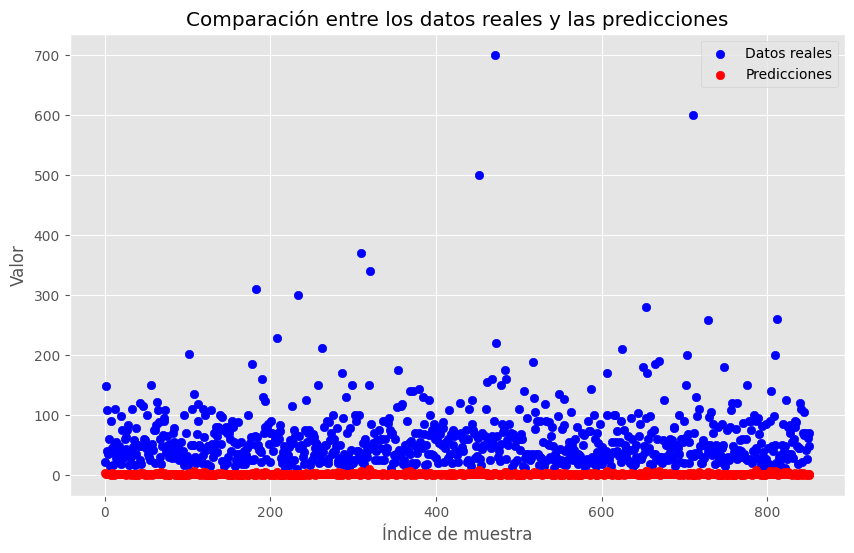

Mean Squared Error:
6303.797654751286
Mean Absolute Error:
59.08245735437098
R2 Score:
-1.1914555391623498
100%|██████████| 10/10 [00:32<00:00,  3.24s/trial, best loss: 5126.526533219832]
{'dropout': 0.1071708488059922, 'n_layers': 1, 'n_neurons': 1}


In [41]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from tensorflow.keras.callbacks import EarlyStopping

trials = Trials()
best = fmin(fn=train_model, space=space, algo=tpe.suggest, max_evals=10, trials=trials)
print(best)

In [42]:
space = {
    #'n_neurons': hp.choice('n_neurons', [32, 64, 128]),
    #'n_neurons': hp.choice('n_neurons', [512, 1024, 2018]),
    'n_neurons': hp.choice('n_neurons', [4, 8]),
    'dropout': hp.uniform('dropout', 0.0,0.5),
    'n_layers': hp.choice('n_layers', [1, 2])
}


Parameters:
{'dropout': 0.28300611968220113, 'n_layers': 2, 'n_neurons': 4}
27/27 [==============================] - 0s 2ms/step

  0%|          | 0/10 [00:02<?, ?trial/s, best loss=?]

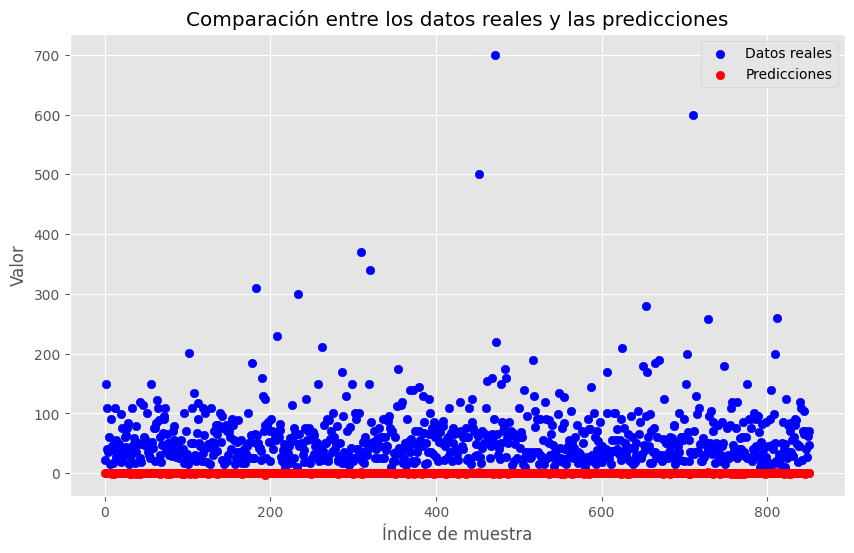

Mean Squared Error:
6535.6751846392
Mean Absolute Error:
60.65192127890203
R2 Score:
-1.2720655658654043
Parameters:
{'dropout': 0.10952359118248856, 'n_layers': 2, 'n_neurons': 8}
27/27 [==============================] - 0s 3ms/step

 10%|█         | 1/10 [00:04<00:24,  2.76s/trial, best loss: 6535.6751846392]

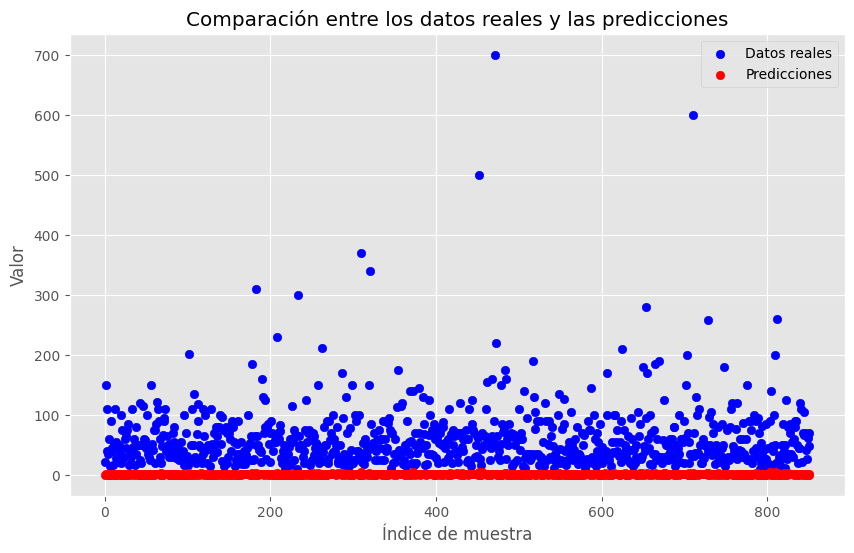

Mean Squared Error:
6430.321486170562
Mean Absolute Error:
59.88695139765407
R2 Score:
-1.235440350602297
Parameters:
{'dropout': 0.0630200827220897, 'n_layers': 1, 'n_neurons': 4}
27/27 [==============================] - 0s 1ms/step

 20%|██        | 2/10 [00:08<00:21,  2.67s/trial, best loss: 6430.321486170562]

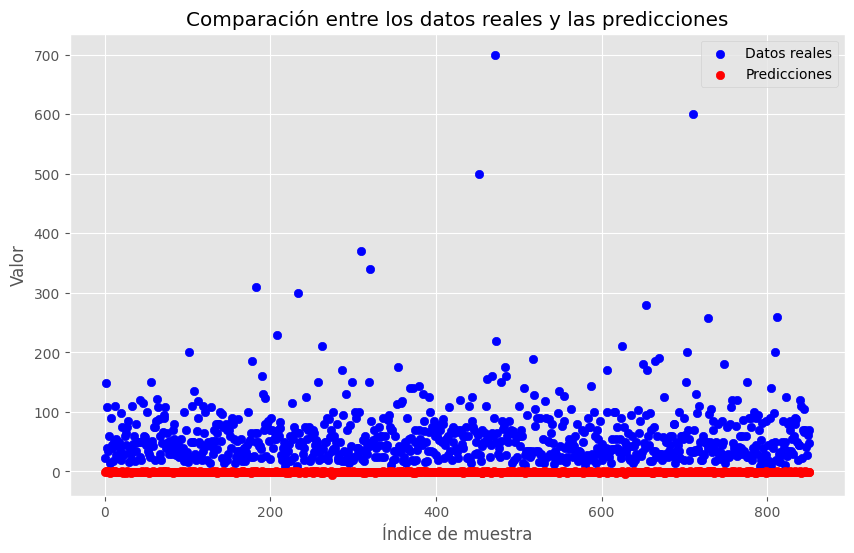

Mean Squared Error:
6623.476950354751
Mean Absolute Error:
61.29673078742989
R2 Score:
-1.3025890179753485
Parameters:
{'dropout': 0.20403681228160897, 'n_layers': 1, 'n_neurons': 4}
27/27 [==============================] - 0s 3ms/step

 30%|███       | 3/10 [00:12<00:23,  3.32s/trial, best loss: 6430.321486170562]

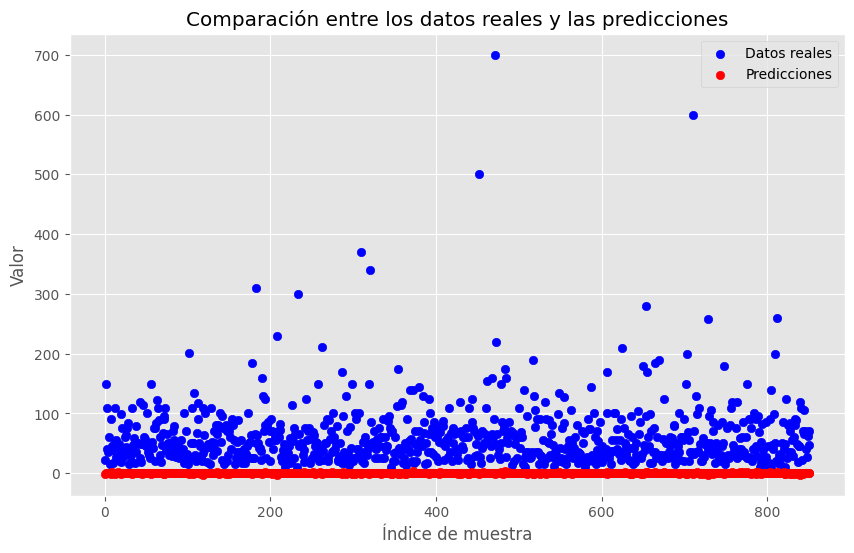

Mean Squared Error:
6523.932817933323
Mean Absolute Error:
60.29204258447766
R2 Score:
-1.2679834433148693
Parameters:
{'dropout': 0.06263763973231173, 'n_layers': 1, 'n_neurons': 4}
27/27 [==============================] - 0s 4ms/step

 40%|████      | 4/10 [00:18<00:23,  3.85s/trial, best loss: 6430.321486170562]

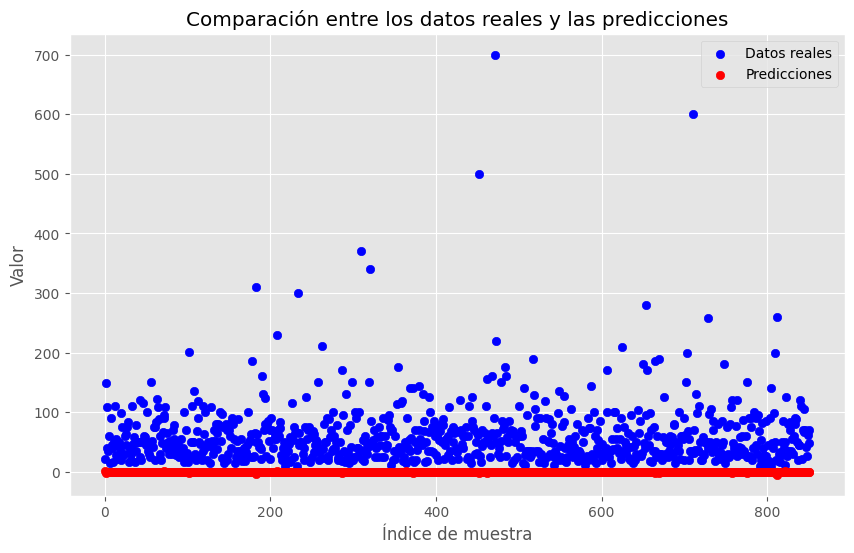

Mean Squared Error:
6585.281906206323
Mean Absolute Error:
60.76240788643498
R2 Score:
-1.2893108726965998
Parameters:
{'dropout': 0.13822510750444034, 'n_layers': 1, 'n_neurons': 4}
27/27 [==============================] - 0s 3ms/step

 50%|█████     | 5/10 [00:21<00:20,  4.05s/trial, best loss: 6430.321486170562]

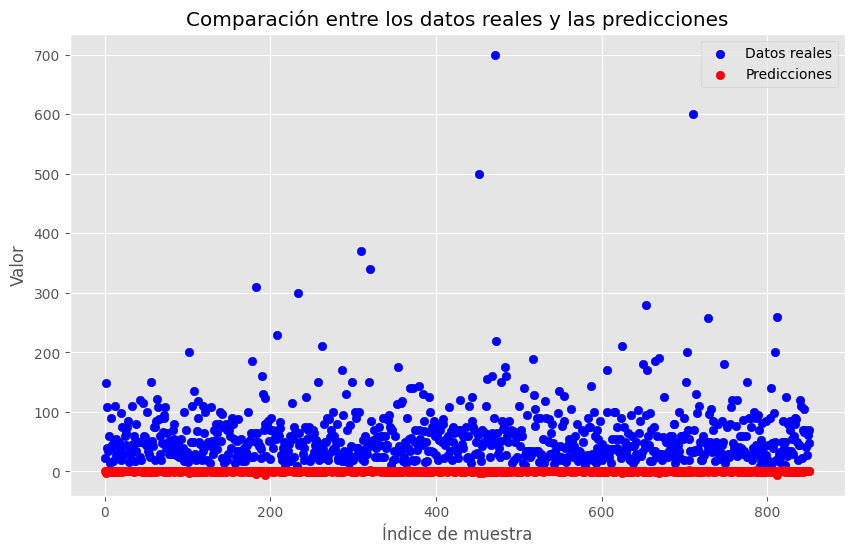

Mean Squared Error:
6563.398939425938
Mean Absolute Error:
60.52963304514625
R2 Score:
-1.2817034665914822
Parameters:
{'dropout': 0.24135990766291665, 'n_layers': 2, 'n_neurons': 4}
27/27 [==============================] - 0s 1ms/step

 60%|██████    | 6/10 [00:24<00:15,  3.87s/trial, best loss: 6430.321486170562]

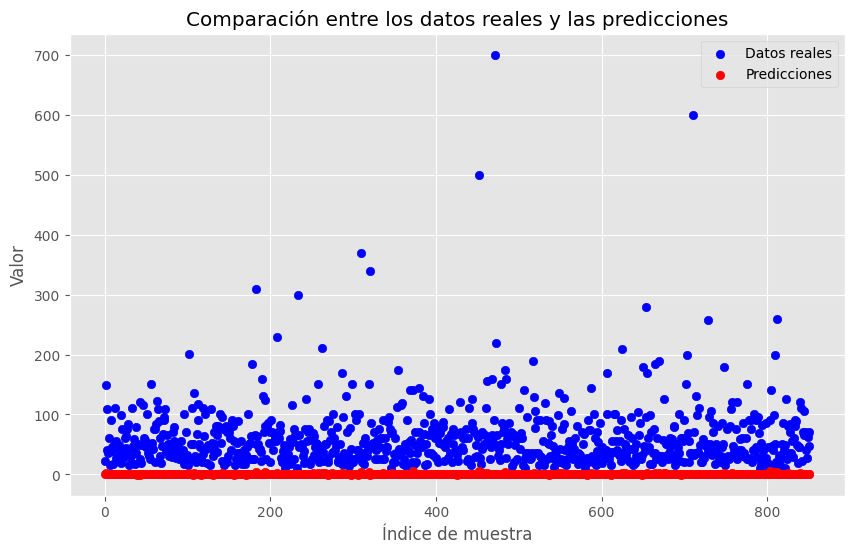

Mean Squared Error:
6468.035354846054
Mean Absolute Error:
60.20826918403115
R2 Score:
-1.2485512197860271
Parameters:
{'dropout': 0.33851933679442764, 'n_layers': 1, 'n_neurons': 8}
27/27 [==============================] - 0s 2ms/step

 70%|███████   | 7/10 [00:26<00:10,  3.35s/trial, best loss: 6430.321486170562]

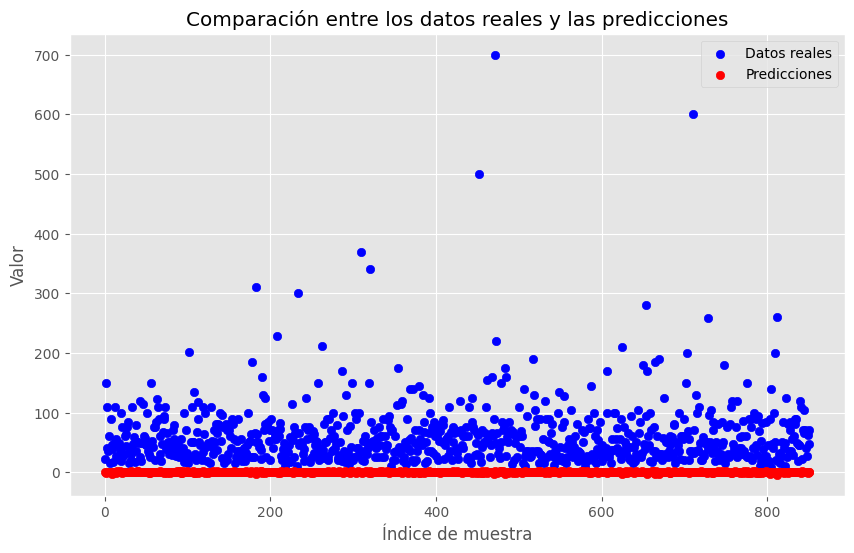

Mean Squared Error:
6537.236688769886
Mean Absolute Error:
60.29570762688478
R2 Score:
-1.2726084079843987
Parameters:
{'dropout': 0.39910701377748486, 'n_layers': 2, 'n_neurons': 4}
27/27 [==============================] - 0s 1ms/step

 80%|████████  | 8/10 [00:28<00:06,  3.04s/trial, best loss: 6430.321486170562]

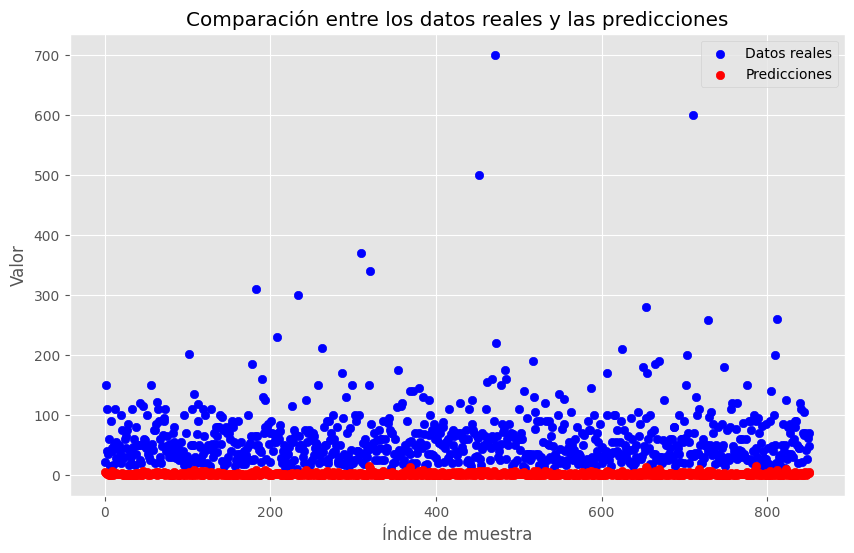

Mean Squared Error:
6276.637929270357
Mean Absolute Error:
59.06892137941271
R2 Score:
-1.1820137178814192
Parameters:
{'dropout': 0.15287371072937656, 'n_layers': 2, 'n_neurons': 4}
27/27 [==============================] - 0s 1ms/step

 90%|█████████ | 9/10 [00:31<00:02,  2.88s/trial, best loss: 6276.637929270357]

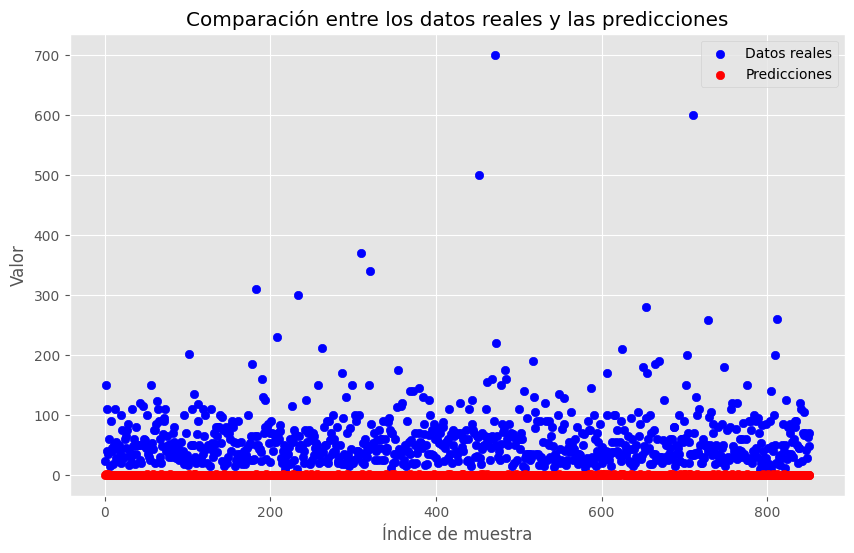

Mean Squared Error:
6537.34193344528
Mean Absolute Error:
60.51566095110422
R2 Score:
-1.2726449952988226
100%|██████████| 10/10 [00:31<00:00,  3.16s/trial, best loss: 6276.637929270357]
{'dropout': 0.39910701377748486, 'n_layers': 1, 'n_neurons': 0}


In [43]:
trials = Trials()
best = fmin(fn=train_model, space=space, algo=tpe.suggest, max_evals=10, trials=trials)
print(best)

En los resultados podemos ver una salida peor a la obtenida sin la busqueda de parametro Si agregamos mas capas y mas neuronas esta claro que memoriza los datos de training. Los modelos estan en generan sufiriendo se overfiting, asi que se deberia volver a analisar los datos y tal vez aplicar validacion cruzada con el fin de saber detectar el sobreajuste.


Lo que mas me llama la atension son los valores R2 negativos, es posible que el modelo este ajustado a una regresion opuesta a la tendencia de los datos pero no encuentro el posible error